In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

DONE BY SRIJA BASAK

In [ ]:
df=pd.read_csv('/content/healthcare_dataset.csv')

### Checking the presence of null values

In [ ]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

None of the columns of the dataset contain any null values

In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2/2/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,10/7/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,12/18/2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,10/9/2022,Penicillin,Abnormal


In [ ]:
df.shape

(55500, 15)

In [ ]:
df['Date of Admission']=pd.to_datetime(df['Date of Admission'])
df['Discharge Date']=pd.to_datetime(df['Discharge Date'])

In [ ]:
df['Days in Hospital']=df['Discharge Date']-df['Date of Admission']

In [ ]:
df['Admission Year']=df['Date of Admission'].dt.year
df['Admission Month']=df['Date of Admission'].dt.month
df['Admission Day']=df['Date of Admission'].dt.day
df['Admission Weekday']=df['Date of Admission'].dt.weekday

In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days in Hospital,Admission Year,Admission Month,Admission Day,Admission Weekday
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2024-02-02,Paracetamol,Normal,2 days,2024,1,31,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6 days,2019,8,20,1
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,2022-10-07,Aspirin,Normal,15 days,2022,9,22,3
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,2020-12-18,Ibuprofen,Abnormal,30 days,2020,11,18,2
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,2022-10-09,Penicillin,Abnormal,20 days,2022,9,19,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Name                55500 non-null  object         
 1   Age                 55500 non-null  int64          
 2   Gender              55500 non-null  object         
 3   Blood Type          55500 non-null  object         
 4   Medical Condition   55500 non-null  object         
 5   Date of Admission   55500 non-null  datetime64[ns] 
 6   Doctor              55500 non-null  object         
 7   Hospital            55500 non-null  object         
 8   Insurance Provider  55500 non-null  object         
 9   Billing Amount      55500 non-null  float64        
 10  Room Number         55500 non-null  int64          
 11  Admission Type      55500 non-null  object         
 12  Discharge Date      55500 non-null  datetime64[ns] 
 13  Medication          55500 non-n

### Descriptive statistics of each column of the dataset

In [ ]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date,Days in Hospital,Admission Year,Admission Month,Admission Day,Admission Weekday
count,55500.000000,55500,55500.000000,55500.000000,55500,55500,55500.000000,55500.00000,55500.000000,55500.000000
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504,15 days 12:12:58.378378378,2021.334631,6.52845,15.679081,2.998955
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00,1 days 00:00:00,2019.000000,1.00000,1.000000,0.000000
25%,35.000000,2020-07-28 00:00:00,13241.224655,202.000000,2020-08-12 00:00:00,8 days 00:00:00,2020.000000,4.00000,8.000000,1.000000
50%,52.000000,2021-11-01 00:00:00,25538.069380,302.000000,2021-11-17 00:00:00,15 days 00:00:00,2021.000000,7.00000,16.000000,3.000000
75%,68.000000,2023-02-03 00:00:00,37820.508432,401.000000,2023-02-18 00:00:00,23 days 00:00:00,2023.000000,9.25000,23.000000,5.000000
max,89.000000,2024-05-07 00:00:00,52764.276740,500.000000,2024-06-06 00:00:00,30 days 00:00:00,2024.000000,12.00000,31.000000,6.000000
std,19.602454,NaN,14211.454431,115.243069,NaN,8 days 15:49:49.456115772,1.497310,3.43689,8.824412,1.997530


In [ ]:
df['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [ ]:
df['Admission Type'].value_counts()

Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64

In [ ]:
df['Blood Type'].value_counts()

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

In [ ]:
df['Test Results'].value_counts()

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

### Printing the name of the doctor having most no of patients

In [ ]:
#Doctor having most no of patients
doctor_max_admission=df['Doctor'].value_counts().idxmax()
print("Doctor with most no of patients -" ,doctor_max_admission)

Doctor with most no of patients - Michael Smith


In [ ]:
df1=df.copy()

### Printing the details of the oldest patient in the dataset

In [ ]:
#oldest patient in the dataset, age, medical condition, admission type and test result
oldest_patient_age=df1['Age'].max()
oldest_patient_name=df1[df['Age']==oldest_patient_age]['Name'].iloc[0].upper()
print(f"Oldest patient in the dataset: {oldest_patient_name}\nAge: {oldest_patient_age}")
med_oldest_patient_name=df1[df['Age']==oldest_patient_age]['Medical Condition'].iloc[0]
print(f"Medical Condition: {med_oldest_patient_name}")
admission_oldest_patient_name=df1[df['Age']==oldest_patient_age]['Admission Type'].iloc[0]
print(f"Admission Type: {admission_oldest_patient_name}")
test_oldest_patient_name=df1[df['Age']==oldest_patient_age]['Test Results'].iloc[0]
print(f"Test Result: {test_oldest_patient_name}")

Oldest patient in the dataset: DAVID NEWTON
Age: 89
Medical Condition: Arthritis
Admission Type: Elective
Test Result: Inconclusive


### Printing the details of the youngest patient in the dataset

In [ ]:
#youngest patient in the dataset, age, medical condition, admission type and test result
youngest_patient_age=df1['Age'].min()
youngest_patient_name=df1[df['Age']==youngest_patient_age]['Name'].iloc[0].upper()
print(f"Youngest patient in the dataset: {youngest_patient_name}\nAge: {youngest_patient_age}")
med_youngest_patient_name=df1[df['Age']==youngest_patient_age]['Medical Condition'].iloc[0]
print(f"Medical Condition: {med_youngest_patient_name}")
admission_youngest_patient_name=df1[df['Age']==youngest_patient_age]['Admission Type'].iloc[0]
print(f"Admission Type: {admission_youngest_patient_name}")
test_youngest_patient_name=df1[df['Age']==youngest_patient_age]['Test Results'].iloc[0]
print(f"Test Result: {test_youngest_patient_name}")

Youngest patient in the dataset: JAMES BASS PHD
Age: 13
Medical Condition: Asthma
Admission Type: Emergency
Test Result: Inconclusive


### Monthly admissions yearwise

In [ ]:
monthly_admissions=df.groupby(['Admission Year','Admission Month']).size().reset_index(name='Counts')

monthly_admissions_pivot=monthly_admissions.pivot(index='Admission Month',columns='Admission Year',values='Counts')
monthly_admissions_pivot

Admission Year,2019,2020,2021,2022,2023,2024
Admission Month,,,,,,
1,NaN,950.0,933.0,969.0,931.0,909.0
2,NaN,881.0,837.0,777.0,880.0,880.0
3,NaN,937.0,969.0,938.0,922.0,906.0
4,NaN,924.0,870.0,880.0,898.0,946.0
5,686.0,978.0,903.0,892.0,927.0,213.0
6,907.0,935.0,926.0,970.0,961.0,NaN
7,957.0,1007.0,978.0,951.0,919.0,NaN
8,1001.0,1014.0,894.0,955.0,968.0,NaN
9,936.0,904.0,867.0,919.0,920.0,NaN


### Trends of monthly admissions yearwise

<Figure size 1200x600 with 0 Axes>

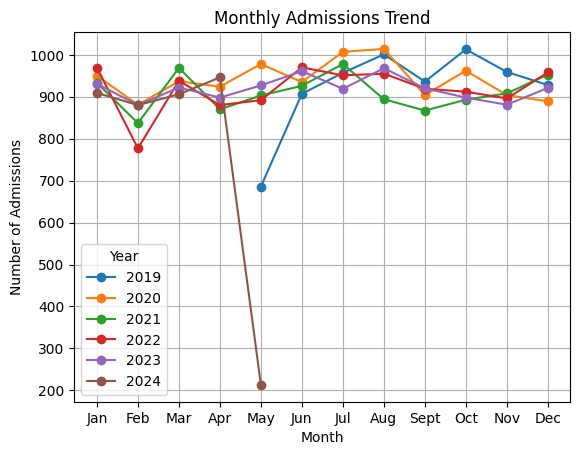

In [ ]:
plt.figure(figsize=(12,6))
monthly_admissions_pivot.plot(kind='line',marker='o')

plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.title('Monthly Admissions Trend')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [ ]:
df1=df.copy()

### Creating a dataframe from the original dataset with columns 'Name', 'Medical Condition', 'Admission Type', 'Days in Hospital'

In [ ]:
patient_days=df1[['Name','Medical Condition','Admission Type','Days in Hospital']]
patient_days.head()

,Name,Medical Condition,Admission Type,Days in Hospital
0,Bobby JacksOn,Cancer,Urgent,2 days
1,LesLie TErRy,Obesity,Emergency,6 days
2,DaNnY sMitH,Obesity,Emergency,15 days
3,andrEw waTtS,Diabetes,Elective,30 days
4,adrIENNE bEll,Cancer,Urgent,20 days


### Pie chart showing the percentage of people for every medical condition

In [ ]:
#pie chart
fig=px.pie(df,names='Medical Condition',title='Overview of medical conditions')
fig.show()

### No. of patients in each hospital

In [ ]:
#group by hospital and calculate number of patients
patient_count_by_hospital=df.groupby('Hospital').size().sort_values(ascending=False)
print(patient_count_by_hospital) #This is a series

patient_hospital_df=patient_count_by_hospital.reset_index()
patient_hospital_df.columns=['Hospital','Patient Count']

Hospital
LLC Smith                      44
Ltd Smith                      39
Johnson PLC                    38
Smith Ltd                      37
Smith PLC                      36
                               ..
Jimenez Wade, and King          1
Jimenez Roy, Johnson and        1
Jimenez Logan Lee, and          1
Jimenez Humphrey and Evans,     1
and Zuniga Thompson, Blake      1
Length: 39876, dtype: int64


In [ ]:
patient_hospital_df.head()

,Hospital,Patient Count
0,LLC Smith,44
1,Ltd Smith,39
2,Johnson PLC,38
3,Smith Ltd,37
4,Smith PLC,36


### Average patient age for each admission type

In [ ]:
#Group by admission type and calculating average age
avg_age_admission=df.groupby('Admission Type')['Age'].mean().sort_index()
avg_age_admission_df=avg_age_admission.reset_index()
avg_age_admission_df.columns=['Admission Type','Average Age']
avg_age_admission_df.head()

,Admission Type,Average Age
0,Elective,51.418547
1,Emergency,51.553506
2,Urgent,51.647071


<Axes: ylabel='Average Age'>

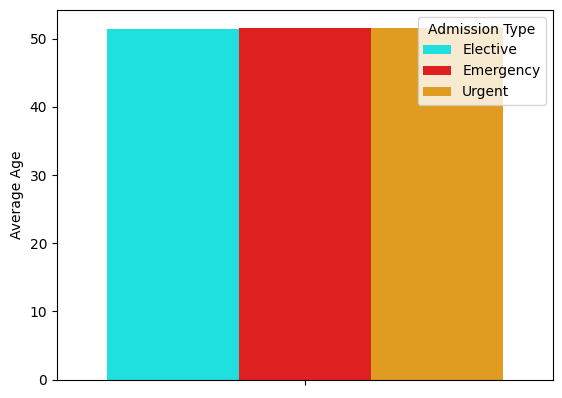

In [ ]:
custom_palette=['cyan','red','orange']
sns.barplot(avg_age_admission_df,hue='Admission Type',y='Average Age',palette=custom_palette)


### Creating a box plot representing statistics of medical conditions (min, first quartile, median, second quartile, max) as per gender

In [ ]:
#box plot in plotly
fig=px.box(df,x='Gender',y='Medical Condition',points='all',title='Box Plot for medical conditions as per gender')
fig.show()

### Pie chart depicting percentage of people with a particular blood type

In [ ]:
#pie chart
fig=px.pie(df,names='Blood Type',title='Overview of Blood Type')
fig.show()

### Categorical plot depicting billing amount for each admission type as per gender

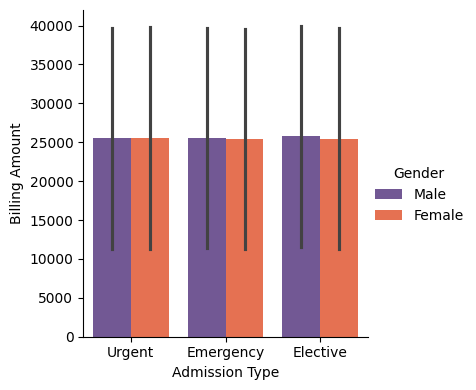

In [ ]:
# Custom palette for this plot
custom_palette = ["#623B94", "#FF5223"]  # Example custom colors

g = sns.catplot(
    data=df, kind="bar",
    x="Admission Type", y="Billing Amount", hue="Gender",
    errorbar="sd", palette=custom_palette, alpha=.9, height=4,
)

In [ ]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Days in Hospital', 'Admission Year',
       'Admission Month', 'Admission Day', 'Admission Weekday'],
      dtype='object')

### Box plot depicting the statistics of medical conditions among patients

In [ ]:
#box plot in plotly
fig=px.box(df,x='Medical Condition',points='all',title='Box Plot')
fig.show()

### Box plot depicting the statistics of blood type among patients

In [ ]:
#box plot in plotly
fig=px.box(df,x='Blood Type',points='all',title='Box Plot')
fig.show()

In [ ]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Days in Hospital', 'Admission Year',
       'Admission Month', 'Admission Day', 'Admission Weekday'],
      dtype='object')

### Patient count by insurance provider

In [ ]:
patient_count_by_insurance_provider=df.groupby('Insurance Provider').size().sort_values(ascending=False)
insurance_provider_patients=patient_count_by_insurance_provider.reset_index()
insurance_provider_patients.columns=['Insurance Provider','Patient Count']
insurance_provider_patients.head()

,Insurance Provider,Patient Count
0,Cigna,11249
1,Medicare,11154
2,UnitedHealthcare,11125
3,Blue Cross,11059
4,Aetna,10913


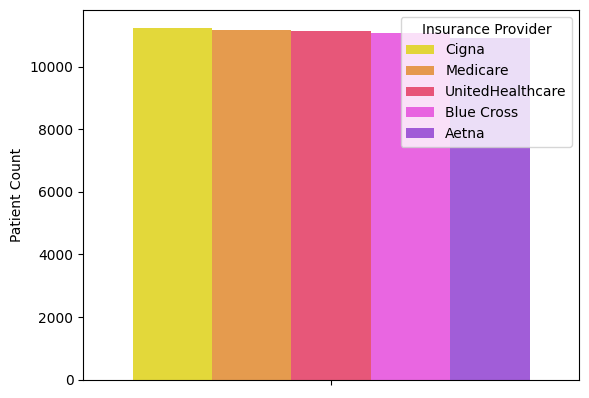

In [ ]:
# Custom palette for this plot
custom_palette = ["#FFF005", "#FF901F", "#FF2B5C","#FF3DF4","#9A34EB"]  # Example custom colors
sns.barplot(insurance_provider_patients,hue='Insurance Provider',y='Patient Count',palette=custom_palette,alpha=0.9)
plt.show()

### Patient count as per medical condition

In [ ]:
patient_count_by_medical_condition=df.groupby('Medical Condition').size().sort_values(ascending=False)
patient_count_by_medical_condition=patient_count_by_medical_condition.reset_index()
patient_count_by_medical_condition.columns=['Medical Condition','Patient Count']
patient_count_by_medical_condition.head()

,Medical Condition,Patient Count
0,Arthritis,9308
1,Diabetes,9304
2,Hypertension,9245
3,Obesity,9231
4,Cancer,9227


### Patient count as per medical condition and admission type

In [ ]:
patient_count_by_med_admission=df.groupby(['Medical Condition','Admission Type']).size().sort_values(ascending=False)
patient_count_by_med_admission=patient_count_by_med_admission.reset_index()
patient_count_by_med_admission.columns=['Medical Condition','Admission Type','Patient Count']
patient_count_by_med_admission

,Medical Condition,Admission Type,Patient Count
0,Diabetes,Urgent,3229
1,Hypertension,Elective,3221
2,Cancer,Elective,3148
3,Obesity,Emergency,3126
4,Arthritis,Urgent,3117
5,Arthritis,Emergency,3108
6,Asthma,Elective,3102
7,Arthritis,Elective,3083
8,Asthma,Urgent,3081
9,Cancer,Urgent,3064


### Bar graph depicting patient count as per admission type for each medical condition

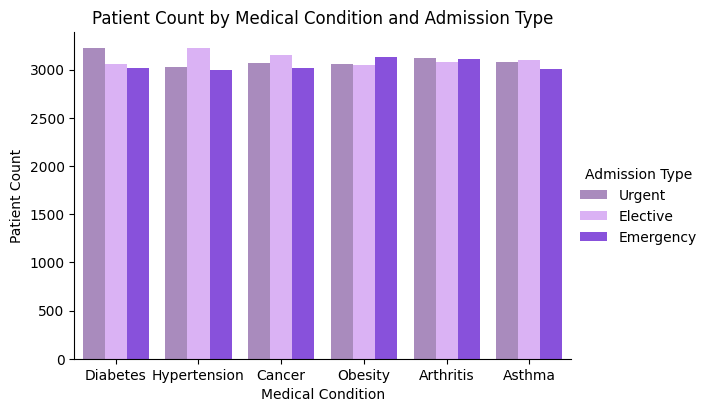

In [ ]:

# Custom palette for this plot
custom_palette = ["#A276BF", "#D89EFF", "#7624F2"]  # Example custom colors

# Create a bar plot with custom palette
h = sns.catplot(
    data=patient_count_by_med_admission, kind="bar",
    x="Medical Condition", y="Patient Count", hue="Admission Type",
    palette=custom_palette,  # Set custom palette here
    errorbar="sd", alpha=.9, height=4, aspect=1.5
)

# Set labels and title
h.set_axis_labels("Medical Condition", "Patient Count")
plt.title("Patient Count by Medical Condition and Admission Type")

# Show plot
plt.show()


### Count of each possible test results as for each of the medical conditions

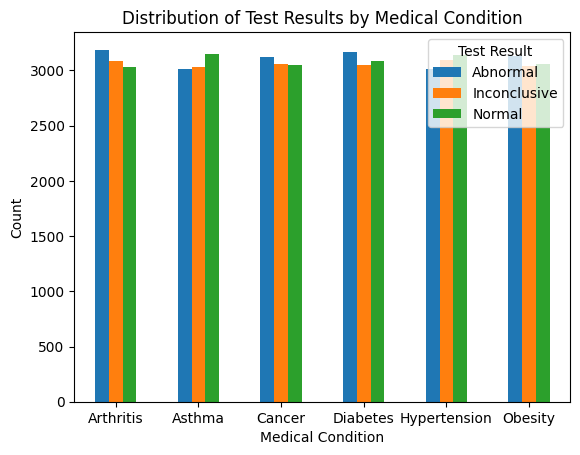

In [ ]:

#count frequencies of each combination of variables
counts=df.groupby(['Medical Condition','Test Results']).size().unstack()

#Plotting
counts.plot(kind='bar',stacked=False)
plt.title('Distribution of Test Results by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Test Result')
plt.show()


### Stacked bar plot depicting the distribution of medical condition by Gender

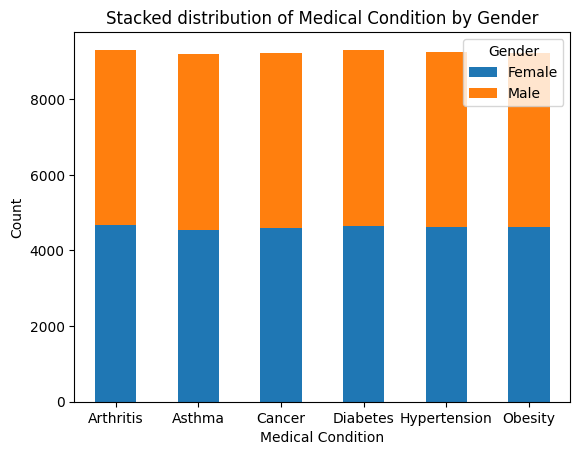

In [ ]:
#count frequencies of each combination of variables
counts=df.groupby(['Medical Condition','Gender']).size().unstack()
counts.plot(kind='bar',stacked=True)
plt.title('Stacked distribution of Medical Condition by Gender')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

### Stacked bar plot depicting the distribution of admission type by test results

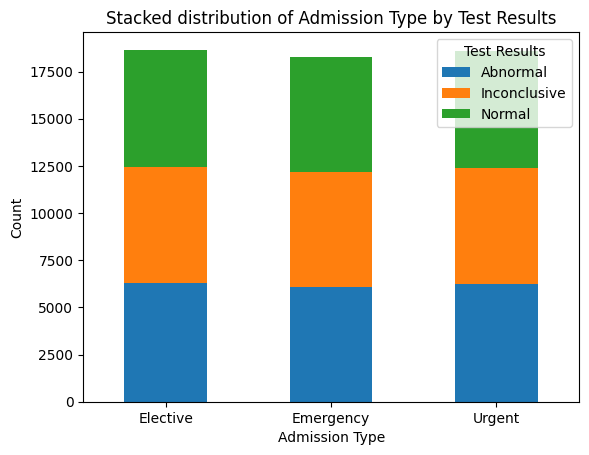

In [ ]:
#count frequencies of each combination of variables
counts=df.groupby(['Admission Type','Test Results']).size().unstack()
counts.plot(kind='bar',stacked=True)
plt.title('Stacked distribution of Admission Type by Test Results')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Test Results')
plt.show()

### Count of patients as per each of the medication taken for each disorder

In [ ]:
patient_count_by_med_medication=df.groupby(['Medical Condition','Medication']).size().sort_values(ascending=False)
patient_count_by_med_medication=patient_count_by_med_medication.reset_index()
patient_count_by_med_medication.columns=['Medical Condition','Medication','Patient Count']
patient_count_by_med_medication

,Medical Condition,Medication,Patient Count
0,Cancer,Lipitor,1922
1,Arthritis,Aspirin,1918
2,Hypertension,Ibuprofen,1893
3,Diabetes,Lipitor,1893
4,Obesity,Penicillin,1893
5,Asthma,Paracetamol,1888
6,Diabetes,Penicillin,1881
7,Arthritis,Paracetamol,1877
8,Cancer,Ibuprofen,1873
9,Arthritis,Penicillin,1866
